# Tesla (TSLA) Stock Price prediction using Facebook Prophet

In [ ]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [ ]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization


In [ ]:
import pandas as pd
import plotly.express as ex
from prophet import Prophet

In [ ]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [ ]:
df = pd.read_csv("TSLA .csv")

In [ ]:
#read_csv function from pandas

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100
1,2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75713800
2,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
3,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
4,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
...,...,...,...,...,...,...,...
246,2023-10-13,258.899994,259.600006,250.220001,251.119995,251.119995,102073800
247,2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
248,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
249,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800


In [ ]:
df.shape

(251, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,206.779841,211.318327,202.147131,206.907848,206.907848,1.350742e+08
std,44.886325,45.272303,44.585161,44.954921,44.954921,4.085097e+07
min,103.000000,111.750000,101.809998,108.099998,108.099998,5.067270e+07
25%,176.635002,182.419998,172.504998,178.474998,178.474998,1.052324e+08
50%,198.539993,203.000000,192.889999,197.580002,197.580002,1.275241e+08
75%,249.385002,255.080001,244.464996,250.215004,250.215004,1.610392e+08
max,296.040009,299.290009,289.519989,293.339996,293.339996,3.065906e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [ ]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [ ]:
ex.area(df, x="Date", y="Close")

In [ ]:
ex.line(df, x="Date", y="Close")

In [ ]:
ex.area(df, x="Date", y="Volume")

In [ ]:
ex.bar(df, y="Volume")

In [ ]:
ex.box(df, y="Close")

# Understanding Facebook Prophet

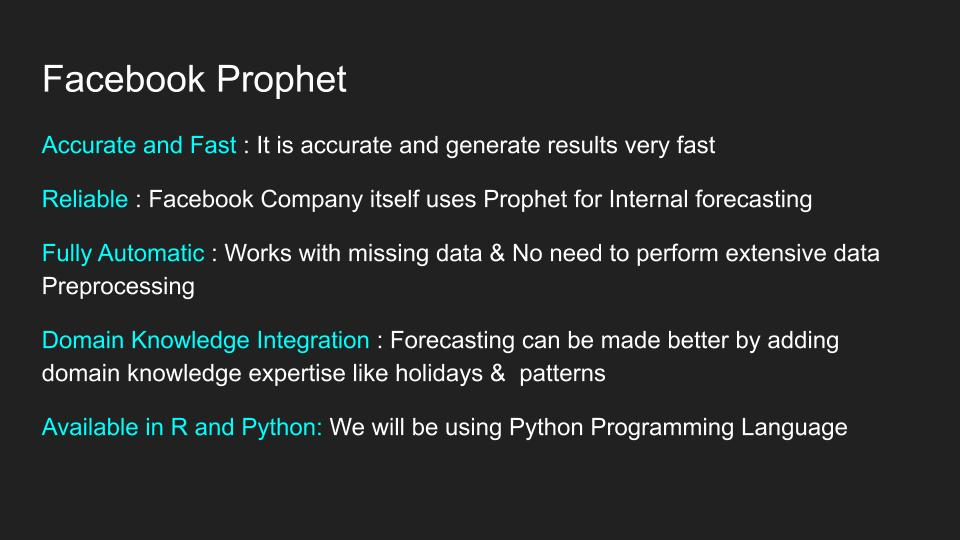

## Data Preperation

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100
1,2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75713800
2,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800
3,2022-10-25,210.100006,224.350006,210.000000,222.419998,222.419998,96507900
4,2022-10-26,219.399994,230.600006,218.199997,224.639999,224.639999,85012500
...,...,...,...,...,...,...,...
246,2023-10-13,258.899994,259.600006,250.220001,251.119995,251.119995,102073800
247,2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
248,2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
249,2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800


In [ ]:
column = ['Date','Close']
ndf = pd.DataFrame(df,columns=column)

In [ ]:
ndf

,Date,Close
0,2022-10-20,207.279999
1,2022-10-21,214.440002
2,2022-10-24,211.250000
3,2022-10-25,222.419998
4,2022-10-26,224.639999
...,...,...
246,2023-10-13,251.119995
247,2023-10-16,253.919998
248,2023-10-17,254.850006
249,2023-10-18,242.679993


In [ ]:
prophet_df = ndf.rename(columns={'Date':'ds', 'Close':'y'})

In [ ]:

prophet_df

,ds,y
0,2022-10-20,207.279999
1,2022-10-21,214.440002
2,2022-10-24,211.250000
3,2022-10-25,222.419998
4,2022-10-26,224.639999
...,...,...
246,2023-10-13,251.119995
247,2023-10-16,253.919998
248,2023-10-17,254.850006
249,2023-10-18,242.679993


## Creating Facebook Prophet Model

In [ ]:
m = Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjf78sg41/qwohbdrf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjf78sg41/37b5k390.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76508', 'data', 'file=/tmp/tmpjf78sg41/qwohbdrf.json', 'init=/tmp/tmpjf78sg41/37b5k390.json', 'output', 'file=/tmp/tmpjf78sg41/prophet_modelpr3zy5xr/prophet_model-20231020105018.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:50:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:50:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [ ]:
future = m.make_future_dataframe(periods=30)
forcast = m.predict(future)

In [ ]:
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-10-20,202.402837,169.110028,229.947250,202.402837,202.402837,-2.159445,-2.159445,-2.159445,-2.159445,-2.159445,-2.159445,0.0,0.0,0.0,200.243392
1,2022-10-21,201.780597,171.705333,231.417101,201.780597,201.780597,-0.497066,-0.497066,-0.497066,-0.497066,-0.497066,-0.497066,0.0,0.0,0.0,201.283531
2,2022-10-24,199.913876,170.224784,233.119545,199.913876,199.913876,0.945354,0.945354,0.945354,0.945354,0.945354,0.945354,0.0,0.0,0.0,200.859230
3,2022-10-25,199.291636,168.635553,227.116607,199.291636,199.291636,-1.088100,-1.088100,-1.088100,-1.088100,-1.088100,-1.088100,0.0,0.0,0.0,198.203536
4,2022-10-26,198.669396,167.088655,229.313733,198.669396,198.669396,-1.316105,-1.316105,-1.316105,-1.316105,-1.316105,-1.316105,0.0,0.0,0.0,197.353291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2023-11-14,267.070261,237.307243,296.392867,264.903748,269.269655,-1.088100,-1.088100,-1.088100,-1.088100,-1.088100,-1.088100,0.0,0.0,0.0,265.982161
277,2023-11-15,267.235725,232.015170,295.174694,264.948478,269.589401,-1.316105,-1.316105,-1.316105,-1.316105,-1.316105,-1.316105,0.0,0.0,0.0,265.919621
278,2023-11-16,267.401190,237.428690,293.901772,265.048483,269.906346,-2.159445,-2.159445,-2.159445,-2.159445,-2.159445,-2.159445,0.0,0.0,0.0,265.241745
279,2023-11-17,267.566654,236.123540,297.487424,265.075923,270.223357,-0.497066,-0.497066,-0.497066,-0.497066,-0.497066,-0.497066,0.0,0.0,0.0,267.069588


In [ ]:
ex.line(forcast, x='ds', y='yhat')

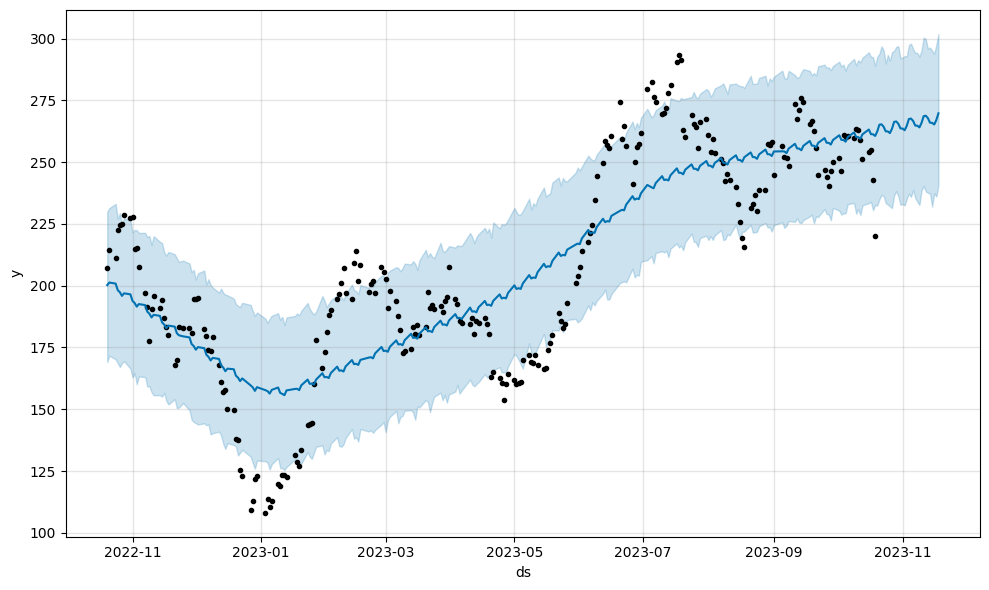

In [ ]:
figure = m.plot(forcast, xlabel='ds', ylabel='y')

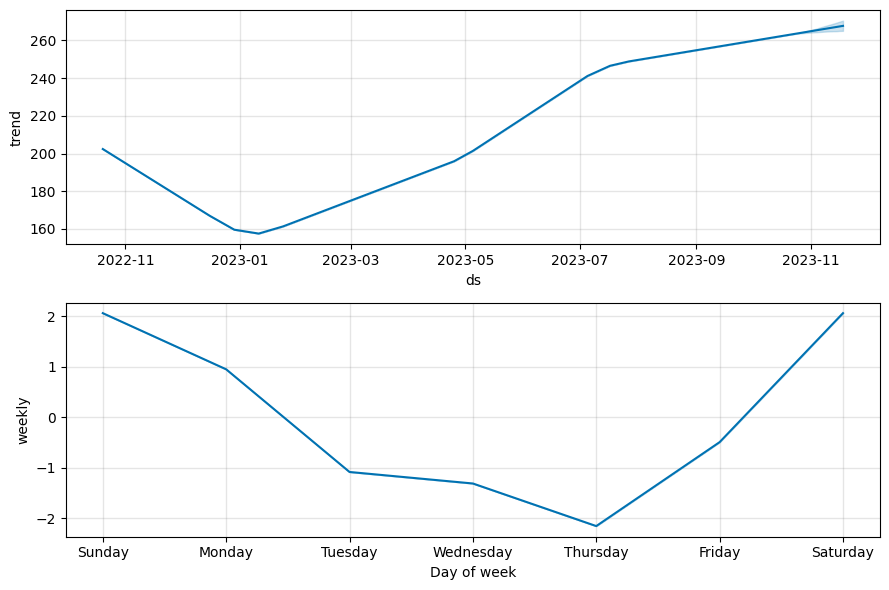

In [ ]:
figure2 = m.plot_components(forcast)

##Downloading the Forecast data

In [ ]:
from google.colab import files
forcast.to_csv('forcast.csv')
files.download('forcast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>